In [2]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")


In [3]:
print(os.getcwd())
os.listdir()

c:\Users\abrow\code\launchgc\Andrew_Brown_submission


['analysis_writeup.docx',
 'analysis_writeup.pdf',
 'gc_sales_forecast_nb.ipynb',
 'READ_ME.txt',
 'TEST_digital_card_orders_11-11-22.csv',
 'TEST_order_item_11-11-22.feather',
 '~$alysis_writeup.docx']

## IMPORTING DATA ##

In [4]:
dco = pd.read_csv('TEST_digital_card_orders_11-11-22.csv')

In [5]:
feather = pd.read_feather('TEST_order_item_11-11-22.feather')

In [6]:
feather['order_id'].max()

205512

In [7]:
dco.head(10)

,Unnamed: 0,id,created_date,display_order_id,status,country,language
0,0,1,2021-01-01 00:01:23.576,9061-2954-,Captured,US,en
1,1,2,2021-01-01 00:03:58.933,9061-4954-,Captured,US,en
2,2,3,2021-01-01 00:07:16.498,9061-6954-,Captured,US,en
3,3,4,2021-01-01 00:09:46.058,9061-7954-,Captured,US,en
4,4,5,2021-01-01 00:13:41.993,9061-0064-,Captured,US,en
5,5,6,2021-01-01 00:15:53.997,9061-1064-,Captured,US,en
6,6,7,2021-01-01 00:18:22.197,9061-3064-,Captured,US,en
7,7,8,2021-01-01 00:22:11.564,9061-5064-,Captured,US,en
8,8,9,2021-01-01 00:24:58.175,9061-6064-,Captured,US,en
9,9,10,2021-01-01 00:27:47.405,9061-8064-,Captured,US,en


In [8]:
#fix import issue
dco.drop('Unnamed: 0',axis=1,inplace=True)

In [9]:
feather.head()

,order_id,id,display_order_id,created_date,product_denomination,product_currency,product_sku,sender_name,recipient_name,delivery_type,recipient_email,recipient_address_line1,recipient_phone
0,1,1,9061-2954-,2021-01-01 00:01:23.582,5000.0,USD,DOOB2CAPP0USD-DIGLGCLAU-001,Sarah Sanders,Robert Boyd,1.0,None,None,1643373353
1,2,2,9061-4954-,2021-01-01 00:03:58.937,10000.0,USD,DOOLGCPOD0USD-DIGLGCLAU-001,Benjamin Garrison,James Reese,1.0,None,None,(807)420-6319x780
2,3,3,9061-6954-,2021-01-01 00:07:16.504,20000.0,USD,UBEB2CWEB0USD-DIGLGCLAU-001,Samantha Travis,Sarah Barnes,0.0,john60@chapman.com,None,None
3,4,4,9061-7954-,2021-01-01 00:09:46.062,5000.0,USD,UBEB2CAPP0USD-DIGLGCLAU-001,Debbie Reed,Olivia Gonzales,0.0,twhite@mendoza.com,None,None
4,5,5,9061-0064-,2021-01-01 00:13:41.997,10000.0,USD,UBEEATSB2CWEB0USD-DIGLGCLAU-001,Robin Thompson,Jennifer Allen,0.0,jo70@schwartz.com,None,None


## Table Structure ##


In [10]:
dco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135713 entries, 0 to 135712
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                135713 non-null  int64 
 1   created_date      135713 non-null  object
 2   display_order_id  135713 non-null  object
 3   status            135687 non-null  object
 4   country           135713 non-null  object
 5   language          135713 non-null  object
dtypes: int64(1), object(5)
memory usage: 6.2+ MB


In [11]:
feather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205512 entries, 0 to 205511
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   order_id                 205512 non-null  int64         
 1   id                       205512 non-null  int64         
 2   display_order_id         205512 non-null  object        
 3   created_date             205508 non-null  datetime64[ns]
 4   product_denomination     205508 non-null  float64       
 5   product_currency         205508 non-null  object        
 6   product_sku              205508 non-null  object        
 7   sender_name              205512 non-null  object        
 8   recipient_name           205512 non-null  object        
 9   delivery_type            205508 non-null  float64       
 10  recipient_email          173908 non-null  object        
 11  recipient_address_line1  687 non-null     object        
 12  recipient_phone 

In [12]:
dco.shape

(135713, 6)

In [13]:
feather.shape

(205512, 13)

In [14]:
dco.describe()

,id
count,135713.000000
mean,67857.000000
std,39177.112879
min,1.000000
25%,33929.000000
50%,67857.000000
75%,101785.000000
max,135713.000000


In [15]:
feather.describe()

,order_id,id,product_denomination,delivery_type
count,205512.000000,205512.000000,205508.000000,205508.000000
mean,102755.249830,102756.499971,6734.279035,0.157395
std,59326.358175,59326.348548,9564.351433,0.374373
min,1.000000,1.000000,1499.000000,0.000000
25%,51378.500000,51378.750000,2500.000000,0.000000
50%,102748.000000,102756.500000,5000.000000,0.000000
75%,154134.250000,154134.250000,7500.000000,0.000000
max,205512.000000,205509.000000,200000.000000,3.000000


## Checking for null values ##

In [16]:
dco.isna().sum()

id                   0
created_date         0
display_order_id     0
status              26
country              0
language             0
dtype: int64

Status is NaN, and this is a small subset of the data. We could choose to drop this or impute a value inside

In [17]:
feather.isna().sum()

order_id                        0
id                              0
display_order_id                0
created_date                    4
product_denomination            4
product_currency                4
product_sku                     4
sender_name                     0
recipient_name                  0
delivery_type                   4
recipient_email             31604
recipient_address_line1    204825
recipient_phone            174623
dtype: int64

Majority of missing data isn't particularly useful, so we should drop columns recipient_email, recipientaddress_line1,recipient_phone

In [18]:
dco[dco['status'].isna()]

,id,created_date,display_order_id,status,country,language
61735,61736,2021-07-07 00:57:28.952,5261-4916-,NaN,US,en
71570,71571,2021-08-10 12:36:37.682,8261-9895-,NaN,BE,en
78887,78888,2021-08-27 19:18:44.410,0361-9190-,NaN,NL,nl
82486,82487,2021-09-06 19:14:43.302,0361-6559-,NaN,NL,nl
93935,93936,2021-10-09 02:56:50.568,3361-2847-,NaN,CA,en
93964,93965,2021-10-09 10:13:58.886,3361-4477-,NaN,NL,nl
103644,103645,2021-11-07 15:03:02.926,6361-3792-,NaN,IT,it
113463,113464,2021-12-06 16:02:47.876,8361-5608-,NaN,FR,fr
114765,114766,2021-12-09 12:53:32.969,9361-4450-,NaN,FR,fr
114794,114795,2021-12-09 14:38:08.011,9361-6060-,NaN,FR,fr


In [19]:
feather[feather['recipient_email'].isna()]

,order_id,id,display_order_id,created_date,product_denomination,product_currency,product_sku,sender_name,recipient_name,delivery_type,recipient_email,recipient_address_line1,recipient_phone
0,1,1,9061-2954-,2021-01-01 00:01:23.582,5000.0,USD,DOOB2CAPP0USD-DIGLGCLAU-001,Sarah Sanders,Robert Boyd,1.0,None,None,1643373353
1,2,2,9061-4954-,2021-01-01 00:03:58.937,10000.0,USD,DOOLGCPOD0USD-DIGLGCLAU-001,Benjamin Garrison,James Reese,1.0,None,None,(807)420-6319x780
17,18,18,9061-6064-,2021-01-01 00:24:58.181,5000.0,USD,DOOLGCPOD0USD-DIGLGCLAU-001,Thomas Kim,Mark Alvarez,1.0,None,None,001-649-904-0438
22,23,23,9061-5164-,2021-01-01 00:38:40.547,20000.0,USD,DOOLGCPOD0USD-DIGLGCLAU-001,Charles Gould,Elizabeth Miles,1.0,None,None,+1-804-869-9502x168
24,25,25,9061-8164-,2021-01-01 00:44:41.424,5000.0,USD,DOOB2CAPP0USD-DIGLGCLAU-001,Beverly Pope,Adam Baker,1.0,None,None,571.660.0187
...,...,...,...,...,...,...,...,...,...,...,...,...,...
205506,205511,205507,2461-6402-,2022-01-14 23:57:08.765,5000.0,USD,DOOLGCPOD0USD-DIGLGCLAU-001,Shannon Wilson,Gabrielle Day,1.0,None,None,001-630-464-4605
205508,113804,205509,9261-4643-,NaT,NaN,None,None,Vanessa Brown,Ann Decker,NaN,None,None,None
205509,60032,205509,9161-6281-,NaT,NaN,None,None,Kimberly Wells,Anthony Rodriguez,NaN,None,None,None
205510,66847,205509,0261-2023-,NaT,NaN,None,None,William Hood,Paul Maldonado,NaN,None,None,None


In [20]:
feather[feather['recipient_address_line1'].isna()]

,order_id,id,display_order_id,created_date,product_denomination,product_currency,product_sku,sender_name,recipient_name,delivery_type,recipient_email,recipient_address_line1,recipient_phone
0,1,1,9061-2954-,2021-01-01 00:01:23.582,5000.0,USD,DOOB2CAPP0USD-DIGLGCLAU-001,Sarah Sanders,Robert Boyd,1.0,None,None,1643373353
1,2,2,9061-4954-,2021-01-01 00:03:58.937,10000.0,USD,DOOLGCPOD0USD-DIGLGCLAU-001,Benjamin Garrison,James Reese,1.0,None,None,(807)420-6319x780
2,3,3,9061-6954-,2021-01-01 00:07:16.504,20000.0,USD,UBEB2CWEB0USD-DIGLGCLAU-001,Samantha Travis,Sarah Barnes,0.0,john60@chapman.com,None,None
3,4,4,9061-7954-,2021-01-01 00:09:46.062,5000.0,USD,UBEB2CAPP0USD-DIGLGCLAU-001,Debbie Reed,Olivia Gonzales,0.0,twhite@mendoza.com,None,None
4,5,5,9061-0064-,2021-01-01 00:13:41.997,10000.0,USD,UBEEATSB2CWEB0USD-DIGLGCLAU-001,Robin Thompson,Jennifer Allen,0.0,jo70@schwartz.com,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...
205507,205512,205508,2461-7402-,2022-01-14 23:58:57.208,30000.0,USD,DOOLGCPOD0USD-DIGLGCLAU-001,Brittany Williams,Michael Morrison,0.0,charlesberger@craig-smith.com,None,None
205508,113804,205509,9261-4643-,NaT,NaN,None,None,Vanessa Brown,Ann Decker,NaN,None,None,None
205509,60032,205509,9161-6281-,NaT,NaN,None,None,Kimberly Wells,Anthony Rodriguez,NaN,None,None,None
205510,66847,205509,0261-2023-,NaT,NaN,None,None,William Hood,Paul Maldonado,NaN,None,None,None


In [21]:
#large portion of recipient data is null, not useful anyways so we can remove these columns

## Checking for exact row duplicates ##

In [22]:
dco.duplicated().sum()

0

In [23]:
feather.duplicated().sum()

0

No row values are duplicated


## Exploring Id Relationship ##

In [24]:
#checking for unique id in dco 
cols = ['id','display_order_id']
for col in cols:
    print(f"Unique in {col}: {dco[col].nunique()}")

Unique in id: 135713
Unique in display_order_id: 130279


In [25]:
#checking for unique id in feather 
cols = ['order_id','id','display_order_id']
for col in cols:
    print(f"Unique in {col}: {feather[col].nunique()}")

Unique in order_id: 135713
Unique in id: 205509
Unique in display_order_id: 130279


Note that dco's id matches' feather's order_id. order_id looks to be the relational key

In [26]:
#checking for duplicates in dco cols
cols = ['id','display_order_id']
for col in cols:
    print(f"Duplicates in {col}: \n{dco[col].duplicated(keep=False).value_counts()}\n")
"""No duplicates in id, dco's primary key looks to be id """

Duplicates in id: 
False    135713
Name: id, dtype: int64

Duplicates in display_order_id: 
False    126793
True       8920
Name: display_order_id, dtype: int64



"No duplicates in id, dco's primary key looks to be id "

In [27]:
#checking for duplicates in feather indexes before removing na values

cols = ['order_id','id','display_order_id']
for col in cols:
    print(f"Duplicates in {col}: \n{feather[col].duplicated(keep=False).value_counts()}\n")

Duplicates in order_id: 
False    118089
True      87423
Name: order_id, dtype: int64

Duplicates in id: 
False    205508
True          4
Name: id, dtype: int64

Duplicates in display_order_id: 
False    110244
True      95268
Name: display_order_id, dtype: int64



It looks like the id in the dco table relates to the order_id in the feather table. They have the same number of unique vales, <br>
but order_id does have duplicates, which would make sense in this case.
Let's join the dco table onto feather so we can have data <br>
related to the status, country, and language on the individual gift cards <br>

Let's check to make sure that from id (dco) to order_id ( feather ), we have a one to many relationshp

In [28]:
#getting the column values
dco_ids = set(dco['id'].values)
feather_ids = set(feather['order_id'].values)

print(len(dco_ids))
print(len(feather_ids))

#checking for set equality
print(dco_ids == feather_ids)
#number matches, however there are some unmapped ids in these sets
#looking at the data, there are skips where the data is improperly matched
#let's fix the matching


135713
135713
False


In [ ]:
dco_ids

In [ ]:
feather_ids

In [31]:
# to investigate the unmapped ids, we take the disjoint union of the sets
# that is, the elements that are not common to both of the sets

disjoint_union = dco_ids.union(feather_ids) - dco_ids.intersection(feather_ids)
len(disjoint_union)

92608

In [32]:
list(dco_ids) == [x for x in range (1,135714)]

True

In [33]:
dco[dco['id']==6]

,id,created_date,display_order_id,status,country,language
5,6,2021-01-01 00:15:53.997,9061-1064-,Captured,US,en


In [34]:
feather[feather['order_id']==15]

,order_id,id,display_order_id,created_date,product_denomination,product_currency,product_sku,sender_name,recipient_name,delivery_type,recipient_email,recipient_address_line1,recipient_phone
14,15,15,9061-1064-,2021-01-01 00:15:54.003,7500.0,USD,DOOB2CAPP0USD-DIGLGCLAU-001,Lynn Jones,Justin Roberts,0.0,llopez@pruitt-landry.net,None,None


This is a large portion of our data, we cannot just drop the improperly matched ids. We should correct the index so we can relate the data . <br>

Note that dco id's are complete from 1 to 135713. Feather's order_id column at the 5 value jumps to 15. <br>
Looking at the timestamps, order_id 15 looks closer to id 6. This is an error in how the data is written to the file.

In [35]:
#we will correct the ids by creating a mapping from what the incorrect one is to what it should be, then correcting the data
dco_ids = sorted(list(dco['id'].values))

f_ids = sorted(list(feather['order_id'].values))

mapping = {}
for d,f in zip(set(dco_ids),set(f_ids)):
    mapping[f] = d


feather['order_id_fix'] = feather['order_id'].map(mapping)
feather


,order_id,id,display_order_id,created_date,product_denomination,product_currency,product_sku,sender_name,recipient_name,delivery_type,recipient_email,recipient_address_line1,recipient_phone,order_id_fix
0,1,1,9061-2954-,2021-01-01 00:01:23.582,5000.0,USD,DOOB2CAPP0USD-DIGLGCLAU-001,Sarah Sanders,Robert Boyd,1.0,None,None,1643373353,1
1,2,2,9061-4954-,2021-01-01 00:03:58.937,10000.0,USD,DOOLGCPOD0USD-DIGLGCLAU-001,Benjamin Garrison,James Reese,1.0,None,None,(807)420-6319x780,2
2,3,3,9061-6954-,2021-01-01 00:07:16.504,20000.0,USD,UBEB2CWEB0USD-DIGLGCLAU-001,Samantha Travis,Sarah Barnes,0.0,john60@chapman.com,None,None,3
3,4,4,9061-7954-,2021-01-01 00:09:46.062,5000.0,USD,UBEB2CAPP0USD-DIGLGCLAU-001,Debbie Reed,Olivia Gonzales,0.0,twhite@mendoza.com,None,None,4
4,5,5,9061-0064-,2021-01-01 00:13:41.997,10000.0,USD,UBEEATSB2CWEB0USD-DIGLGCLAU-001,Robin Thompson,Jennifer Allen,0.0,jo70@schwartz.com,None,None,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205507,205512,205508,2461-7402-,2022-01-14 23:58:57.208,30000.0,USD,DOOLGCPOD0USD-DIGLGCLAU-001,Brittany Williams,Michael Morrison,0.0,charlesberger@craig-smith.com,None,None,135713
205508,113804,205509,9261-4643-,NaT,NaN,None,None,Vanessa Brown,Ann Decker,NaN,None,None,None,74588
205509,60032,205509,9161-6281-,NaT,NaN,None,None,Kimberly Wells,Anthony Rodriguez,NaN,None,None,None,39761
205510,66847,205509,0261-2023-,NaT,NaN,None,None,William Hood,Paul Maldonado,NaN,None,None,None,44184


In [36]:
feather[['order_id','order_id_fix']].head(20)


,order_id,order_id_fix
0,1,1
1,2,2
2,3,3
3,4,4
4,5,5
5,5,5
6,5,5
7,5,5
8,5,5
9,5,5


In [37]:
feather['order_id_fix'].max()

135713

In [38]:
dco['id'].max()

135713

In [39]:
#dropping unneeded columns, renaming to merge on a relational key

dco_data = dco.rename(columns={'id':'order_id_fix'})

dco_data['created_date'] = pd.to_datetime(dco_data['created_date'])

In [40]:
dco_data.head()

,order_id_fix,created_date,display_order_id,status,country,language
0,1,2021-01-01 00:01:23.576,9061-2954-,Captured,US,en
1,2,2021-01-01 00:03:58.933,9061-4954-,Captured,US,en
2,3,2021-01-01 00:07:16.498,9061-6954-,Captured,US,en
3,4,2021-01-01 00:09:46.058,9061-7954-,Captured,US,en
4,5,2021-01-01 00:13:41.993,9061-0064-,Captured,US,en


In [41]:
dco_data.head()

,order_id_fix,created_date,display_order_id,status,country,language
0,1,2021-01-01 00:01:23.576,9061-2954-,Captured,US,en
1,2,2021-01-01 00:03:58.933,9061-4954-,Captured,US,en
2,3,2021-01-01 00:07:16.498,9061-6954-,Captured,US,en
3,4,2021-01-01 00:09:46.058,9061-7954-,Captured,US,en
4,5,2021-01-01 00:13:41.993,9061-0064-,Captured,US,en


In [42]:
#remove incorrect order_id before merge
feather.drop('order_id',axis=1,inplace=True)

In [43]:

#merging
gc_sales =pd.merge(feather,dco_data,how="inner",on='order_id_fix')
gc_sales.head()
#note, during merge the ids at the bottom has no time, and are at bottom because of this. 
#we could use the created date from dco to impute the approximate time, but this is a small 
#subset of the data and we can drop this without consequences

,id,display_order_id_x,created_date_x,product_denomination,product_currency,product_sku,sender_name,recipient_name,delivery_type,recipient_email,recipient_address_line1,recipient_phone,order_id_fix,created_date_y,display_order_id_y,status,country,language
0,1,9061-2954-,2021-01-01 00:01:23.582,5000.0,USD,DOOB2CAPP0USD-DIGLGCLAU-001,Sarah Sanders,Robert Boyd,1.0,None,None,1643373353,1,2021-01-01 00:01:23.576,9061-2954-,Captured,US,en
1,2,9061-4954-,2021-01-01 00:03:58.937,10000.0,USD,DOOLGCPOD0USD-DIGLGCLAU-001,Benjamin Garrison,James Reese,1.0,None,None,(807)420-6319x780,2,2021-01-01 00:03:58.933,9061-4954-,Captured,US,en
2,3,9061-6954-,2021-01-01 00:07:16.504,20000.0,USD,UBEB2CWEB0USD-DIGLGCLAU-001,Samantha Travis,Sarah Barnes,0.0,john60@chapman.com,None,None,3,2021-01-01 00:07:16.498,9061-6954-,Captured,US,en
3,4,9061-7954-,2021-01-01 00:09:46.062,5000.0,USD,UBEB2CAPP0USD-DIGLGCLAU-001,Debbie Reed,Olivia Gonzales,0.0,twhite@mendoza.com,None,None,4,2021-01-01 00:09:46.058,9061-7954-,Captured,US,en
4,5,9061-0064-,2021-01-01 00:13:41.997,10000.0,USD,UBEEATSB2CWEB0USD-DIGLGCLAU-001,Robin Thompson,Jennifer Allen,0.0,jo70@schwartz.com,None,None,5,2021-01-01 00:13:41.993,9061-0064-,Captured,US,en


In [44]:
#we can check our work to make sure that the entries are not too far apart in timestamp
(gc_sales['created_date_x'] - gc_sales['created_date_y']).describe()

count                       205508
mean        0 days 00:00:00.010976
std      0 days 00:00:00.032920371
min         0 days 00:00:00.002000
25%         0 days 00:00:00.004000
50%         0 days 00:00:00.006000
75%         0 days 00:00:00.012000
max         0 days 00:00:05.780000
dtype: object

In [45]:
gc_sales[gc_sales['display_order_id_x']!=gc_sales['display_order_id_y']]
#all display_order ids match

,id,display_order_id_x,created_date_x,product_denomination,product_currency,product_sku,sender_name,recipient_name,delivery_type,recipient_email,recipient_address_line1,recipient_phone,order_id_fix,created_date_y,display_order_id_y,status,country,language


In [46]:
#cleaning up the merged ids, keeping order_id only
gc_sales.drop(['display_order_id_x'],axis=1,inplace=True)

In [47]:
gc_sales.head()

,id,created_date_x,product_denomination,product_currency,product_sku,sender_name,recipient_name,delivery_type,recipient_email,recipient_address_line1,recipient_phone,order_id_fix,created_date_y,display_order_id_y,status,country,language
0,1,2021-01-01 00:01:23.582,5000.0,USD,DOOB2CAPP0USD-DIGLGCLAU-001,Sarah Sanders,Robert Boyd,1.0,None,None,1643373353,1,2021-01-01 00:01:23.576,9061-2954-,Captured,US,en
1,2,2021-01-01 00:03:58.937,10000.0,USD,DOOLGCPOD0USD-DIGLGCLAU-001,Benjamin Garrison,James Reese,1.0,None,None,(807)420-6319x780,2,2021-01-01 00:03:58.933,9061-4954-,Captured,US,en
2,3,2021-01-01 00:07:16.504,20000.0,USD,UBEB2CWEB0USD-DIGLGCLAU-001,Samantha Travis,Sarah Barnes,0.0,john60@chapman.com,None,None,3,2021-01-01 00:07:16.498,9061-6954-,Captured,US,en
3,4,2021-01-01 00:09:46.062,5000.0,USD,UBEB2CAPP0USD-DIGLGCLAU-001,Debbie Reed,Olivia Gonzales,0.0,twhite@mendoza.com,None,None,4,2021-01-01 00:09:46.058,9061-7954-,Captured,US,en
4,5,2021-01-01 00:13:41.997,10000.0,USD,UBEEATSB2CWEB0USD-DIGLGCLAU-001,Robin Thompson,Jennifer Allen,0.0,jo70@schwartz.com,None,None,5,2021-01-01 00:13:41.993,9061-0064-,Captured,US,en


In [48]:
#removing columns that aren't important to analysis
cols = ['recipient_email','recipient_address_line1','recipient_phone','display_order_id_y','created_date_y','product_currency']
gc_sales.drop(cols,axis=1,inplace=True)

In [49]:
gc_sales.shape

(205512, 11)

In [50]:
gc_sales.isna().sum()

id                       0
created_date_x           4
product_denomination     4
product_sku              4
sender_name              0
recipient_name           0
delivery_type            4
order_id_fix             0
status                  29
country                  0
language                 0
dtype: int64

In [51]:
gc_sales.dropna(inplace=True)

In [52]:

gc_sales.isna().sum()

id                      0
created_date_x          0
product_denomination    0
product_sku             0
sender_name             0
recipient_name          0
delivery_type           0
order_id_fix            0
status                  0
country                 0
language                0
dtype: int64

In [53]:
gc_sales.shape

(205479, 11)

In [54]:
gc_sales.dtypes

id                               int64
created_date_x          datetime64[ns]
product_denomination           float64
product_sku                     object
sender_name                     object
recipient_name                  object
delivery_type                  float64
order_id_fix                     int64
status                          object
country                         object
language                        object
dtype: object

In [55]:
#rename date
gc_sales.rename(columns={"created_date_x":"timestamp",'order_id_fix':'order_id'},inplace=True)



In [56]:
gc_sales

,id,timestamp,product_denomination,product_sku,sender_name,recipient_name,delivery_type,order_id,status,country,language
0,1,2021-01-01 00:01:23.582,5000.0,DOOB2CAPP0USD-DIGLGCLAU-001,Sarah Sanders,Robert Boyd,1.0,1,Captured,US,en
1,2,2021-01-01 00:03:58.937,10000.0,DOOLGCPOD0USD-DIGLGCLAU-001,Benjamin Garrison,James Reese,1.0,2,Captured,US,en
2,3,2021-01-01 00:07:16.504,20000.0,UBEB2CWEB0USD-DIGLGCLAU-001,Samantha Travis,Sarah Barnes,0.0,3,Captured,US,en
3,4,2021-01-01 00:09:46.062,5000.0,UBEB2CAPP0USD-DIGLGCLAU-001,Debbie Reed,Olivia Gonzales,0.0,4,Captured,US,en
4,5,2021-01-01 00:13:41.997,10000.0,UBEEATSB2CWEB0USD-DIGLGCLAU-001,Robin Thompson,Jennifer Allen,0.0,5,Captured,US,en
...,...,...,...,...,...,...,...,...,...,...,...
205503,205504,2022-01-14 23:51:28.076,10000.0,DOOLGCPOD0USD-DIGLGCLAU-001,Dr. Cassandra Meyers MD,Kimberly Burnett,1.0,135709,Captured,US,en
205504,205505,2022-01-14 23:53:28.516,10000.0,DOOLGCPOD0USD-DIGLGCLAU-001,Alexis Franklin,Daniel Barnes,1.0,135710,Captured,US,en
205505,205506,2022-01-14 23:55:16.378,5000.0,DOOLGCPOD0USD-DIGLGCLAU-001,Kelli Payne,Paul Roberts,1.0,135711,Captured,US,en
205506,205507,2022-01-14 23:57:08.765,5000.0,DOOLGCPOD0USD-DIGLGCLAU-001,Shannon Wilson,Gabrielle Day,1.0,135712,Captured,US,en


In [57]:
#creating a date and a month column for visualization purposes
gc_sales['year'] = gc_sales.timestamp.dt.year
gc_sales['month'] = gc_sales.timestamp.dt.month
gc_sales['day']=gc_sales.timestamp.dt.day
gc_sales['date']=gc_sales.timestamp.dt.date


### Divide Data set by year ###

In [58]:
#we will separate the data by year so we can use 2021 to build the model and 2022 to evaluate
sales_2021 = gc_sales[gc_sales['year']==2021]
sales_2022 = gc_sales[gc_sales['year']==2022]

In [59]:
sales_2021

,id,timestamp,product_denomination,product_sku,sender_name,recipient_name,delivery_type,order_id,status,country,language,year,month,day,date
0,1,2021-01-01 00:01:23.582,5000.0,DOOB2CAPP0USD-DIGLGCLAU-001,Sarah Sanders,Robert Boyd,1.0,1,Captured,US,en,2021,1,1,2021-01-01
1,2,2021-01-01 00:03:58.937,10000.0,DOOLGCPOD0USD-DIGLGCLAU-001,Benjamin Garrison,James Reese,1.0,2,Captured,US,en,2021,1,1,2021-01-01
2,3,2021-01-01 00:07:16.504,20000.0,UBEB2CWEB0USD-DIGLGCLAU-001,Samantha Travis,Sarah Barnes,0.0,3,Captured,US,en,2021,1,1,2021-01-01
3,4,2021-01-01 00:09:46.062,5000.0,UBEB2CAPP0USD-DIGLGCLAU-001,Debbie Reed,Olivia Gonzales,0.0,4,Captured,US,en,2021,1,1,2021-01-01
4,5,2021-01-01 00:13:41.997,10000.0,UBEEATSB2CWEB0USD-DIGLGCLAU-001,Robin Thompson,Jennifer Allen,0.0,5,Captured,US,en,2021,1,1,2021-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197014,197015,2021-12-31 23:48:04.699,5000.0,DOOLGCPOD0USD-DIGLGCLAU-001,William Jones,Paul Hernandez,1.0,129388,Captured,US,en,2021,12,31,2021-12-31
197015,197016,2021-12-31 23:51:02.077,2500.0,UBEAUDAUSDLAXXY01-0,Madeline Johnson,Stephanie Miller,0.0,129389,Captured,AU,en,2021,12,31,2021-12-31
197016,197017,2021-12-31 23:53:34.641,2500.0,DOOB2CAPP0USD-DIGLGCLAU-001,Bryan Costa,Tiffany Wheeler,1.0,129390,Captured,US,en,2021,12,31,2021-12-31
197017,197018,2021-12-31 23:56:25.847,5000.0,UBEB2CWEB0CAD-DIGLGCLAU-001,Caroline Rodriguez,Angela Phillips,0.0,129391,Declined,CA,en,2021,12,31,2021-12-31


Data is cleaned, ready for analysis

## Exploratory data analysis (merged data) ##

In [60]:
#let's look at our market demographic

In [61]:
#country of most of our clients
sales_2021['country'].value_counts()


US    156600
CA     20634
AU     11789
GB      7036
FR       332
IE       220
IT       139
ES        64
DE        62
NL        57
BE        33
GR         4
SI         4
AT         4
PT         4
FI         4
LT         3
RO         2
SK         2
CY         1
EE         1
CZ         1
Name: country, dtype: int64

<Axes: title={'center': '2021 Country Sales'}>

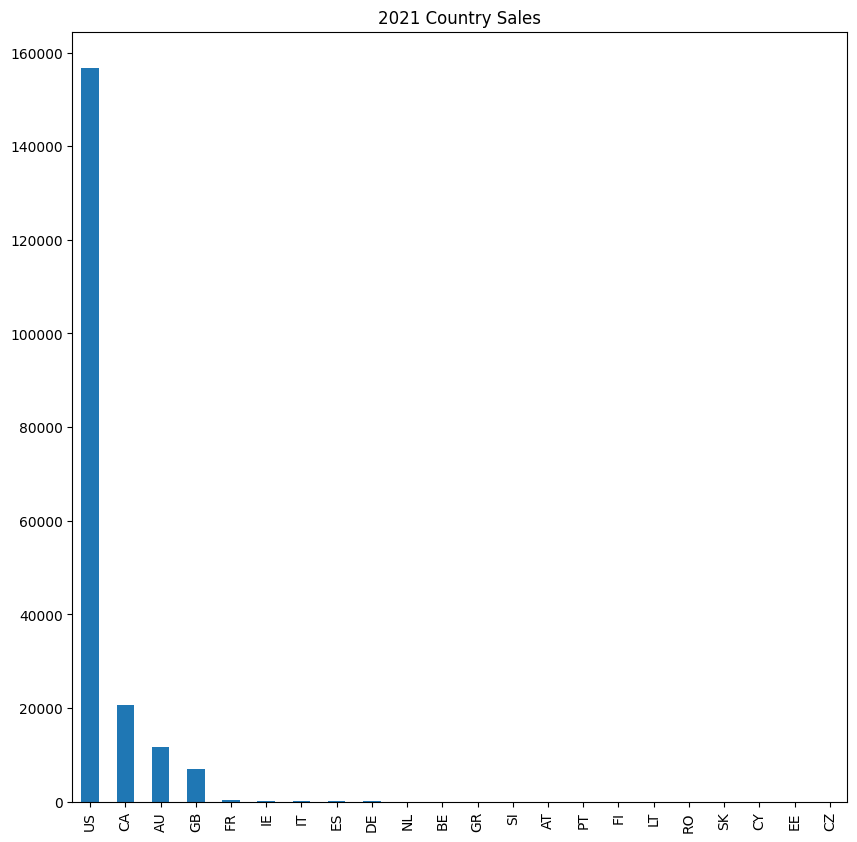

In [62]:
sales_2021['country'].value_counts().plot(kind='bar',figsize=(10,10),title="2021 Country Sales")


In [63]:
#largest customers
sales_2021['sender_name'].value_counts()

Michael Smith         82
John Smith            69
Michael Johnson       69
Christopher Smith     67
Michael Brown         65
                      ..
Virginia Austin        1
Tamara Collins         1
Hunter Black           1
Kayla Ford             1
Caroline Rodriguez     1
Name: sender_name, Length: 119227, dtype: int64

In [64]:
sales_2021[sales_2021['sender_name'] == 'Michael Smith']
#it's unlikely that the same person is ordering from multiple different countries, so a customer id is needed to evaluate who the largest customers are

,id,timestamp,product_denomination,product_sku,sender_name,recipient_name,delivery_type,order_id,status,country,language,year,month,day,date
1713,1714,2021-01-05 17:29:09.980,5000.0,DOOLGCPOD0USD-DIGLGCLAU-001,Michael Smith,Breanna Fisher,1.0,1347,Captured,US,en,2021,1,5,2021-01-05
2456,2457,2021-01-07 00:42:02.522,20000.0,UBEEATSB2CWEB0USD-DIGLGCLAU-001,Michael Smith,Denise Holland,0.0,1906,Captured,US,en,2021,1,7,2021-01-07
2473,2474,2021-01-07 01:04:31.808,2500.0,DOOLGCPOD0USD-DIGLGCLAU-001,Michael Smith,Karen Green,0.0,1913,Captured,US,en,2021,1,7,2021-01-07
9380,9381,2021-01-21 19:25:51.884,2500.0,DOOB2CAPP0USD-DIGLGCLAU-001,Michael Smith,Scott Abbott,0.0,6874,Captured,US,en,2021,1,21,2021-01-21
11325,11326,2021-01-25 19:06:03.548,7500.0,DOOLGCPOD0USD-DIGLGCLAU-001,Michael Smith,James Fox,0.0,8265,Captured,US,en,2021,1,25,2021-01-25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189452,189453,2021-12-23 04:27:23.770,2500.0,UBEB2CWEB0USD-DIGLGCLAU-001,Michael Smith,Jacob Hines,0.0,123094,Declined,US,en,2021,12,23,2021-12-23
191926,191927,2021-12-24 21:09:56.732,5000.0,UBEB2CAPP0CAD-DIGLGCLAU-001,Michael Smith,Joseph Montgomery,0.0,124985,Declined,CA,en,2021,12,24,2021-12-24
193607,193608,2021-12-25 21:37:57.654,10000.0,AIRB2C0USD-DIGLGCLAU-001,Michael Smith,Laura Martin,0.0,126447,Declined,US,en,2021,12,25,2021-12-25
195714,195715,2021-12-29 19:16:47.048,10000.0,ICTUSDUSADLAXXY01-0,Michael Smith,Carol Rivas,0.0,128320,Captured,US,en,2021,12,29,2021-12-29


In [65]:
#tracking growing country demographics
country_volume_by_month = sales_2021.groupby('month')['country'].value_counts(dropna=False)
# plt.plot(country_volume_by_month.index,country_volume_by_month.country)
# temp = country_volume_by_month.value_counts()

In [66]:
country_volume_by_month

month  country
1      US         12693
       CA          1376
       GB           562
       AU           333
       FR             6
                  ...  
12     ES            12
       NL             6
       AT             2
       FI             1
       SK             1
Name: country, Length: 141, dtype: int64

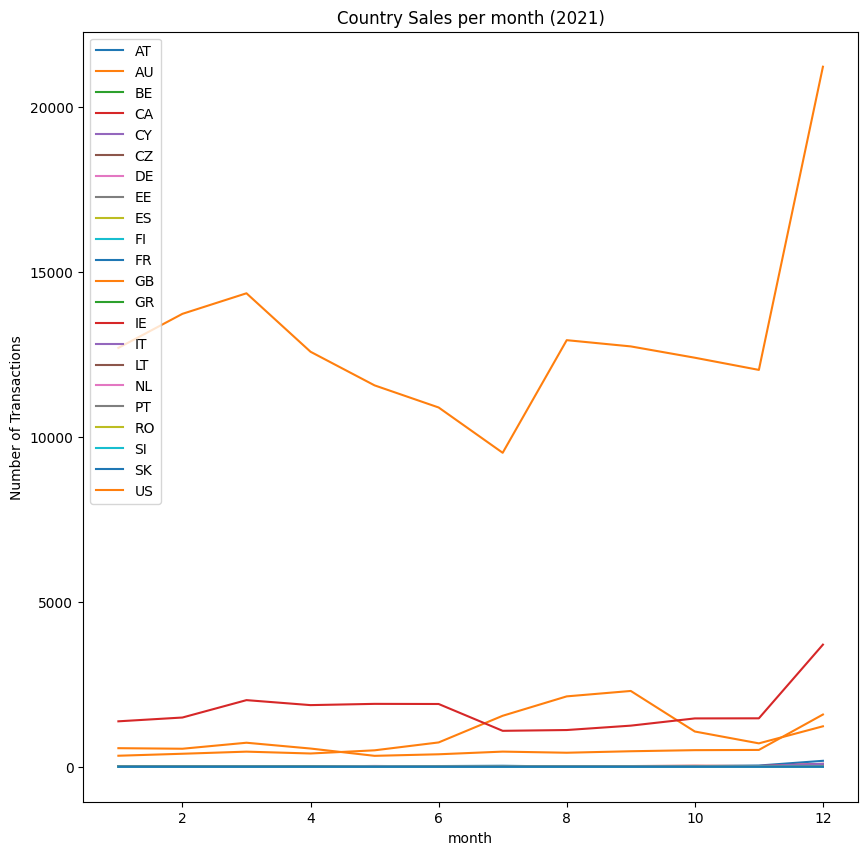

In [67]:
#ploting transactions per month grouped by country
df = sales_2021.groupby(['month'])['country'].value_counts().unstack(fill_value=0)
df.plot(kind='line',title="Country Sales per month (2021)",figsize=(10,10)).set_ylabel('Number of Transactions')
plt.legend(loc='upper left')
plt.style.use('seaborn-dark-palette')

In [68]:
#looking at product details

In [69]:
gc_sales['product_denomination'].value_counts()
#most popular product price is 2500


2500.0     81518
5000.0     50200
10000.0    28061
20000.0     9962
3000.0      7221
           ...  
20800.0        1
57500.0        1
37900.0        1
86500.0        1
69500.0        1
Name: product_denomination, Length: 374, dtype: int64

In [70]:
sales_2021['product_sku'].nunique()

product_buckets = sales_2021['product_sku'].value_counts(normalize=True).rename_axis('product_name').reset_index()
product_buckets.head(10)

#most popular product is the 'DOOLGCPOD0USD-DIGLGCLAU-001' and 'UBEEATSB2CWEB0USD-DIGLGCLAU-001', which make up 40% of the data

,product_name,product_sku
0,DOOLGCPOD0USD-DIGLGCLAU-001,0.349012
1,UBEEATSB2CWEB0USD-DIGLGCLAU-001,0.120332
2,DOOB2CAPP0USD-DIGLGCLAU-001,0.095317
3,UBEB2CWEB0USD-DIGLGCLAU-001,0.069631
4,UBEB2CAPP0USD-DIGLGCLAU-001,0.051265
5,AIRB2C0USD-DIGLGCLAU-001,0.042113
6,UBEEATSB2CWEB0CAD-DIGLGCLAU-001,0.034615
7,UBEEATSB2CAPP0USD-DIGLGCLAU-001,0.032661
8,UBRAUDAUSDLAXXY01-0,0.027879
9,ICTUSDUSADLAXXY01-0,0.025381


In [71]:
product_counts = pd.pivot_table(sales_2021,values=['product_sku'],index=['date'],columns=sales_2021['product_sku'].values,aggfunc='count').fillna(0)
product_counts

product_sku                                               \
           AIRAUDAUSDLAXXY01-0 AIRB2C0USD-DIGLGCLAU-001 AIRCADCANDLAXXY01-0   
date                                                                          
2021-01-01                 0.0                     17.0                 0.0   
2021-01-02                 0.0                     12.0                 0.0   
2021-01-03                 0.0                     13.0                 0.0   
2021-01-04                 0.0                     16.0                 0.0   
2021-01-05                 0.0                     15.0                 0.0   
...                        ...                      ...                 ...   
2021-12-27                 7.0                     51.0                 2.0   
2021-12-28                 0.0                     29.0                 2.0   
2021-12-29                 2.0                     32.0                 2.0   
2021-12-30                 3.0                     27.0                 2.0   
2021-12-31                 2.0                     29.0                 3.0   

                                                                        \
           AIREURDEUDLAXXY01-0 AIREURESPDLAXXY01-0 AIREURFRADLAXXY01-0   
date                                                                     
2021-01-01                 0.0                 0.0                 0.0   
2021-01-02                 0.0                 0.0                 0.0   
2021-01-03                 0.0                 0.0                 0.0   
2021-01-04                 0.0                 0.0                 0.0   
2021-01-05                 0.0                 0.0                 0.0   
...                        ...                 ...                 ...   
2021-12-27                 0.0                 0.0                 1.0   
2021-12-28                 0.0                 0.0                 3.0   
2021-12-29                 0.0                 0.0                 4.0   
2021-12-30                 0.0                 0.0                 5.0   
2021-12-31                 1.0                 0.0                 2.0   

                                                                   \
           AIREURITADLAXXY01-0 AIRGBPGBRDLAXXY01-0 AREUSD15DLAX01   
date                                                                
2021-01-01                 0.0                 0.0            0.0   
2021-01-02                 0.0                 0.0            2.0   
2021-01-03                 0.0                 0.0            1.0   
2021-01-04                 0.0                 0.0            1.0   
2021-01-05                 0.0                 0.0            0.0   
...                        ...                 ...            ...   
2021-12-27                 2.0                 3.0            0.0   
2021-12-28                 0.0                 2.0            2.0   
2021-12-29                 0.0                 2.0            2.0   
2021-12-30                 3.0                 9.0            1.0   
2021-12-31                 1.0                 3.0            2.0   

                                      ...                                  \
           DAZEURDEUDLAXXY01-01M1499  ... UBEEATSB2CAPP0CAD-DIGLGCLAU-001   
date                                  ...                                   
2021-01-01                       0.0  ...                             0.0   
2021-01-02                       0.0  ...                             0.0   
2021-01-03                       0.0  ...                             0.0   
2021-01-04                       0.0  ...                             0.0   
2021-01-05                       0.0  ...                             0.0   
...                              ...  ...                             ...   
2021-12-27                       0.0  ...                             0.0   
2021-12-28                       0.0  ...                             1.0   
2021-12-29                       0.0  ...                    

In [72]:
#Metrics / KPIs
#total revenue for 2021
sales_2021['product_denomination'].sum()


1318593482.0

In [73]:
#average purchase values
#find the average value per each transaction 
total_sales_2021 = sales_2021['product_denomination'].sum()
num_transactions = len(sales_2021)
av_purchase_val =total_sales_2021 / num_transactions

print(f"Average Purchase Value: {av_purchase_val}")

Average Purchase Value: 6693.503837641373


In [74]:
len(sales_2021)

196996

In [75]:
num_transactions

196996

### Modeling ### 
We will use simple moving average to track number of purchases

In [76]:
tmp = sales_2021.groupby('date').size()
tmp.name='num transactions'
daily_sales_2021 = tmp.to_frame()

In [77]:
daily_sales_2021

,num transactions
date,
2021-01-01,333
2021-01-02,294
2021-01-03,295
2021-01-04,503
2021-01-05,510
...,...
2021-12-27,526
2021-12-28,524
2021-12-29,598


In [78]:
def plot_series(df, cols=None, title='Title', xlab=None, ylab=None, steps=1):
    
    # Set figure size to be (18, 9).
    plt.figure(figsize=(18,9))
    
    # Iterate through each column name.
    for col in cols:
            
        # Generate a line plot of the column name.
        # You only have to specify Y, since our
        # index will be a datetime index.
        plt.plot(df[col])
        
    # Generate title and labels.
    plt.title(title, fontsize=26)
    plt.xlabel(xlab, fontsize=20)
    plt.ylabel(ylab, fontsize=20)
    
    # Enlarge tick marks.
    plt.yticks(fontsize=18)
    plt.xticks(df.index[0::steps], fontsize=18)

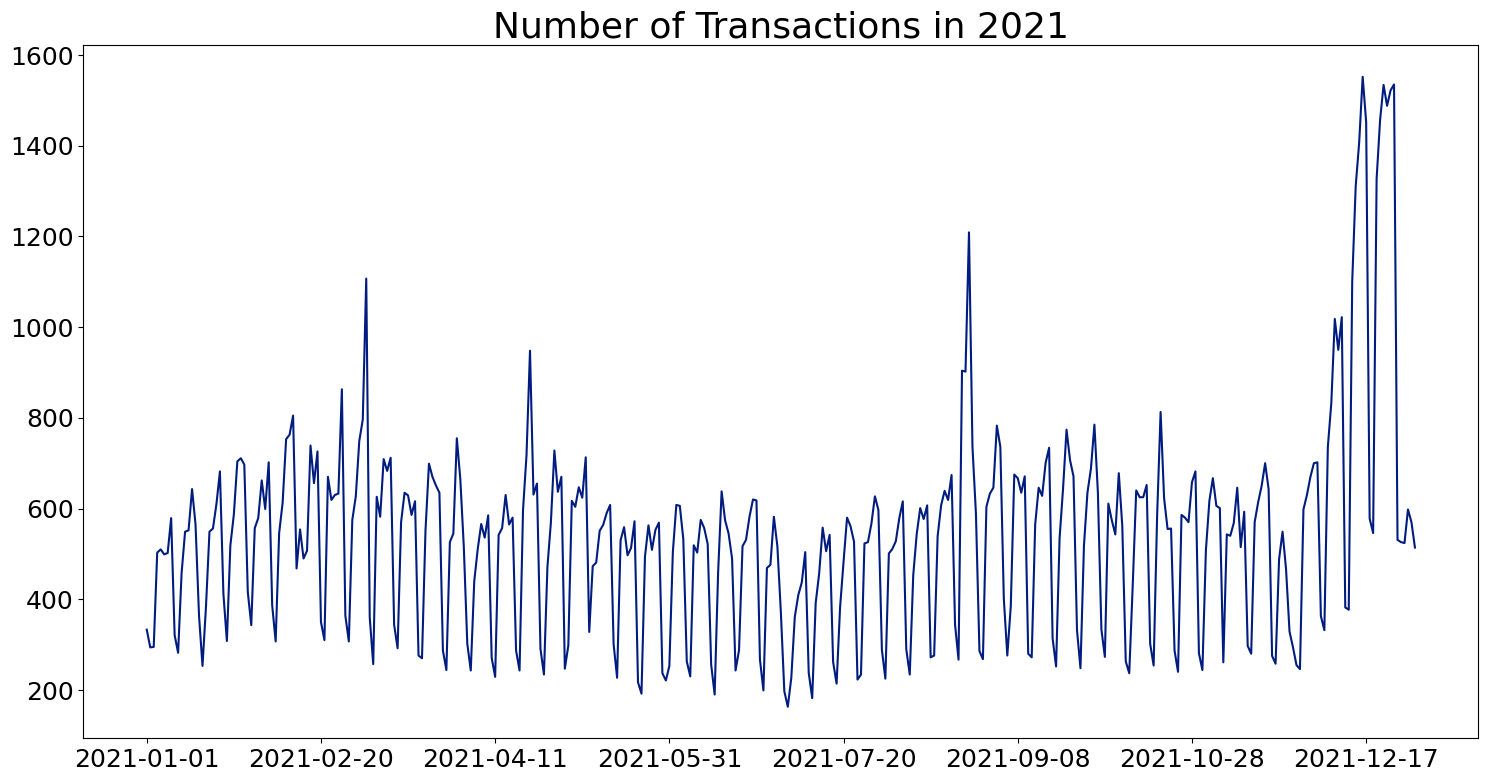

In [79]:
#plotting raw number of sales
plot_series(daily_sales_2021,['num transactions'],title="Number of Transactions in 2021",steps=50)
#note spike towards end of year, holiday season

Text(0, 0.5, 'Frequency')

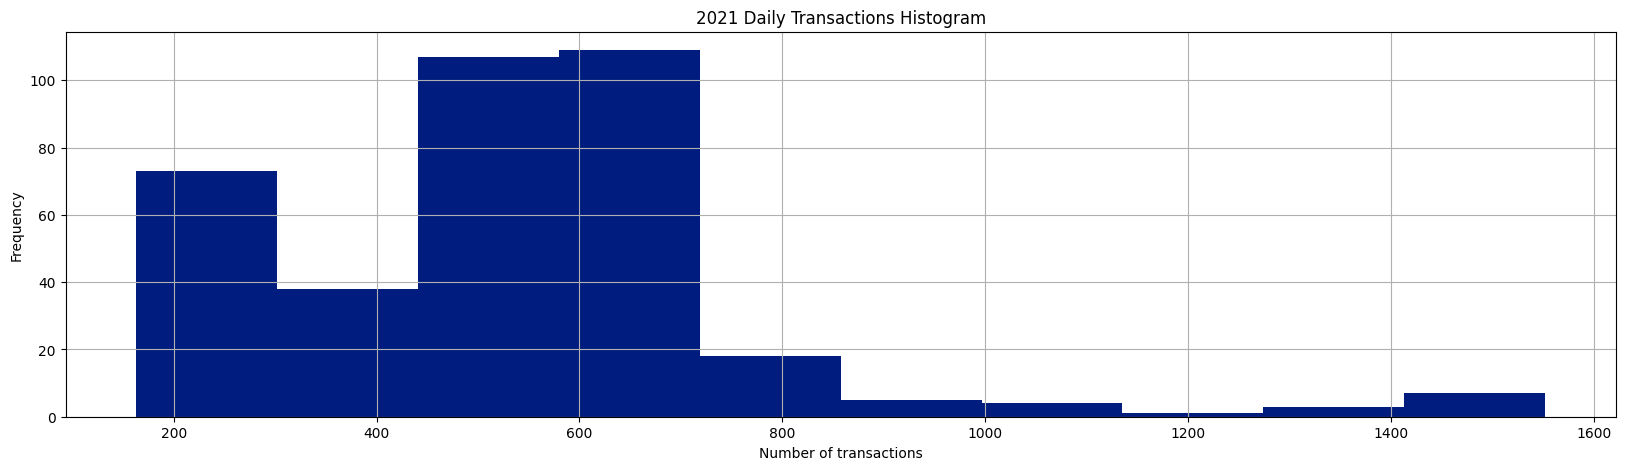

In [80]:
fig = daily_sales_2021['num transactions'].hist(figsize = (20,5),)
fig.set_title('2021 Daily Transactions Histogram')
fig.set_xlabel('Number of transactions')
fig.set_ylabel('Frequency')


In [81]:
#repeating same aggregation for sales_2022
sales_2022.groupby(['date',])['product_sku'].value_counts()

tmp = sales_2022.groupby('date').size()
tmp.name='num transactions'
daily_sales_2022 = tmp.to_frame()
daily_sales_2022.index= pd.to_datetime(daily_sales_2022.index)

daily_sales_2022


,num transactions
date,
2022-01-01,356
2022-01-02,390
2022-01-03,537
2022-01-04,619
2022-01-05,700
2022-01-06,754
2022-01-07,771
2022-01-08,498
2022-01-09,358


In [82]:
temp = daily_sales_2021.copy()
temp.sort_index(inplace=True)
temp.index = pd.to_datetime(temp.index)

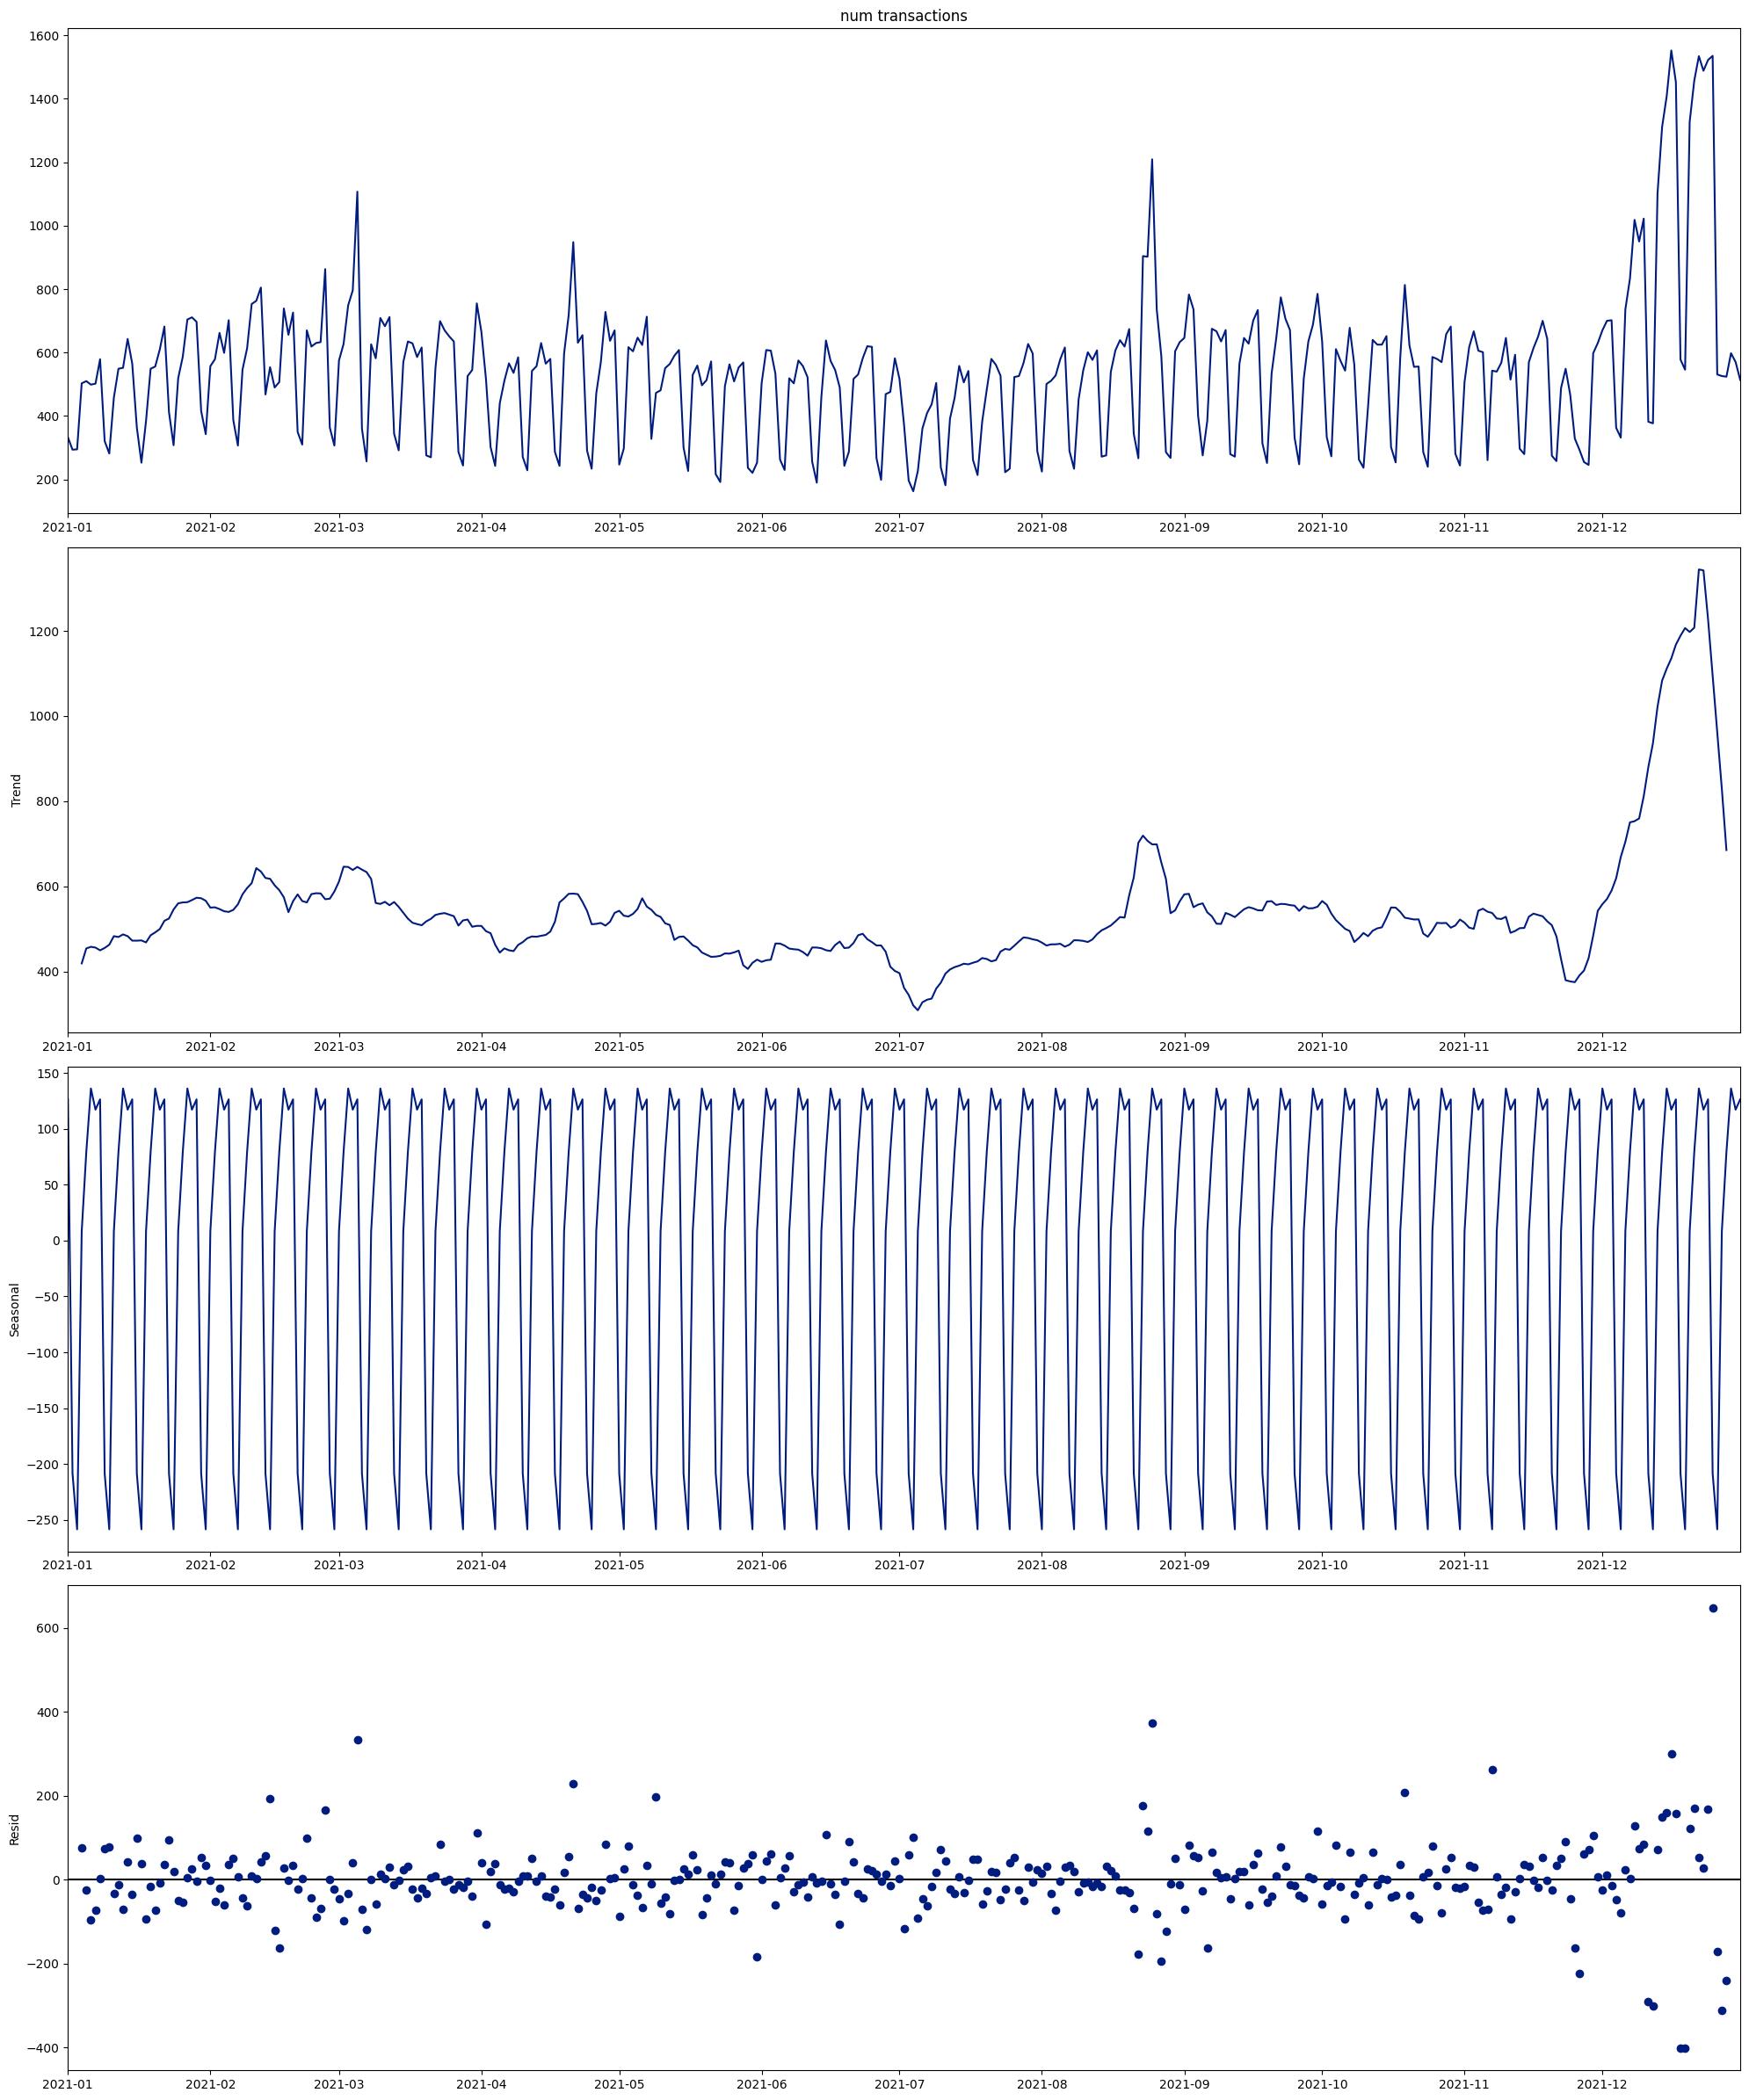

In [83]:
# Additive seasonal decomposition
from pylab import rcParams
import statsmodels.api as sm


rcParams['figure.figsize'] = 20,24
decomposition = sm.tsa.seasonal_decompose(temp['num transactions'], model='additive',period=None) # additive seasonal index
fig = decomposition.plot()
plt.show()

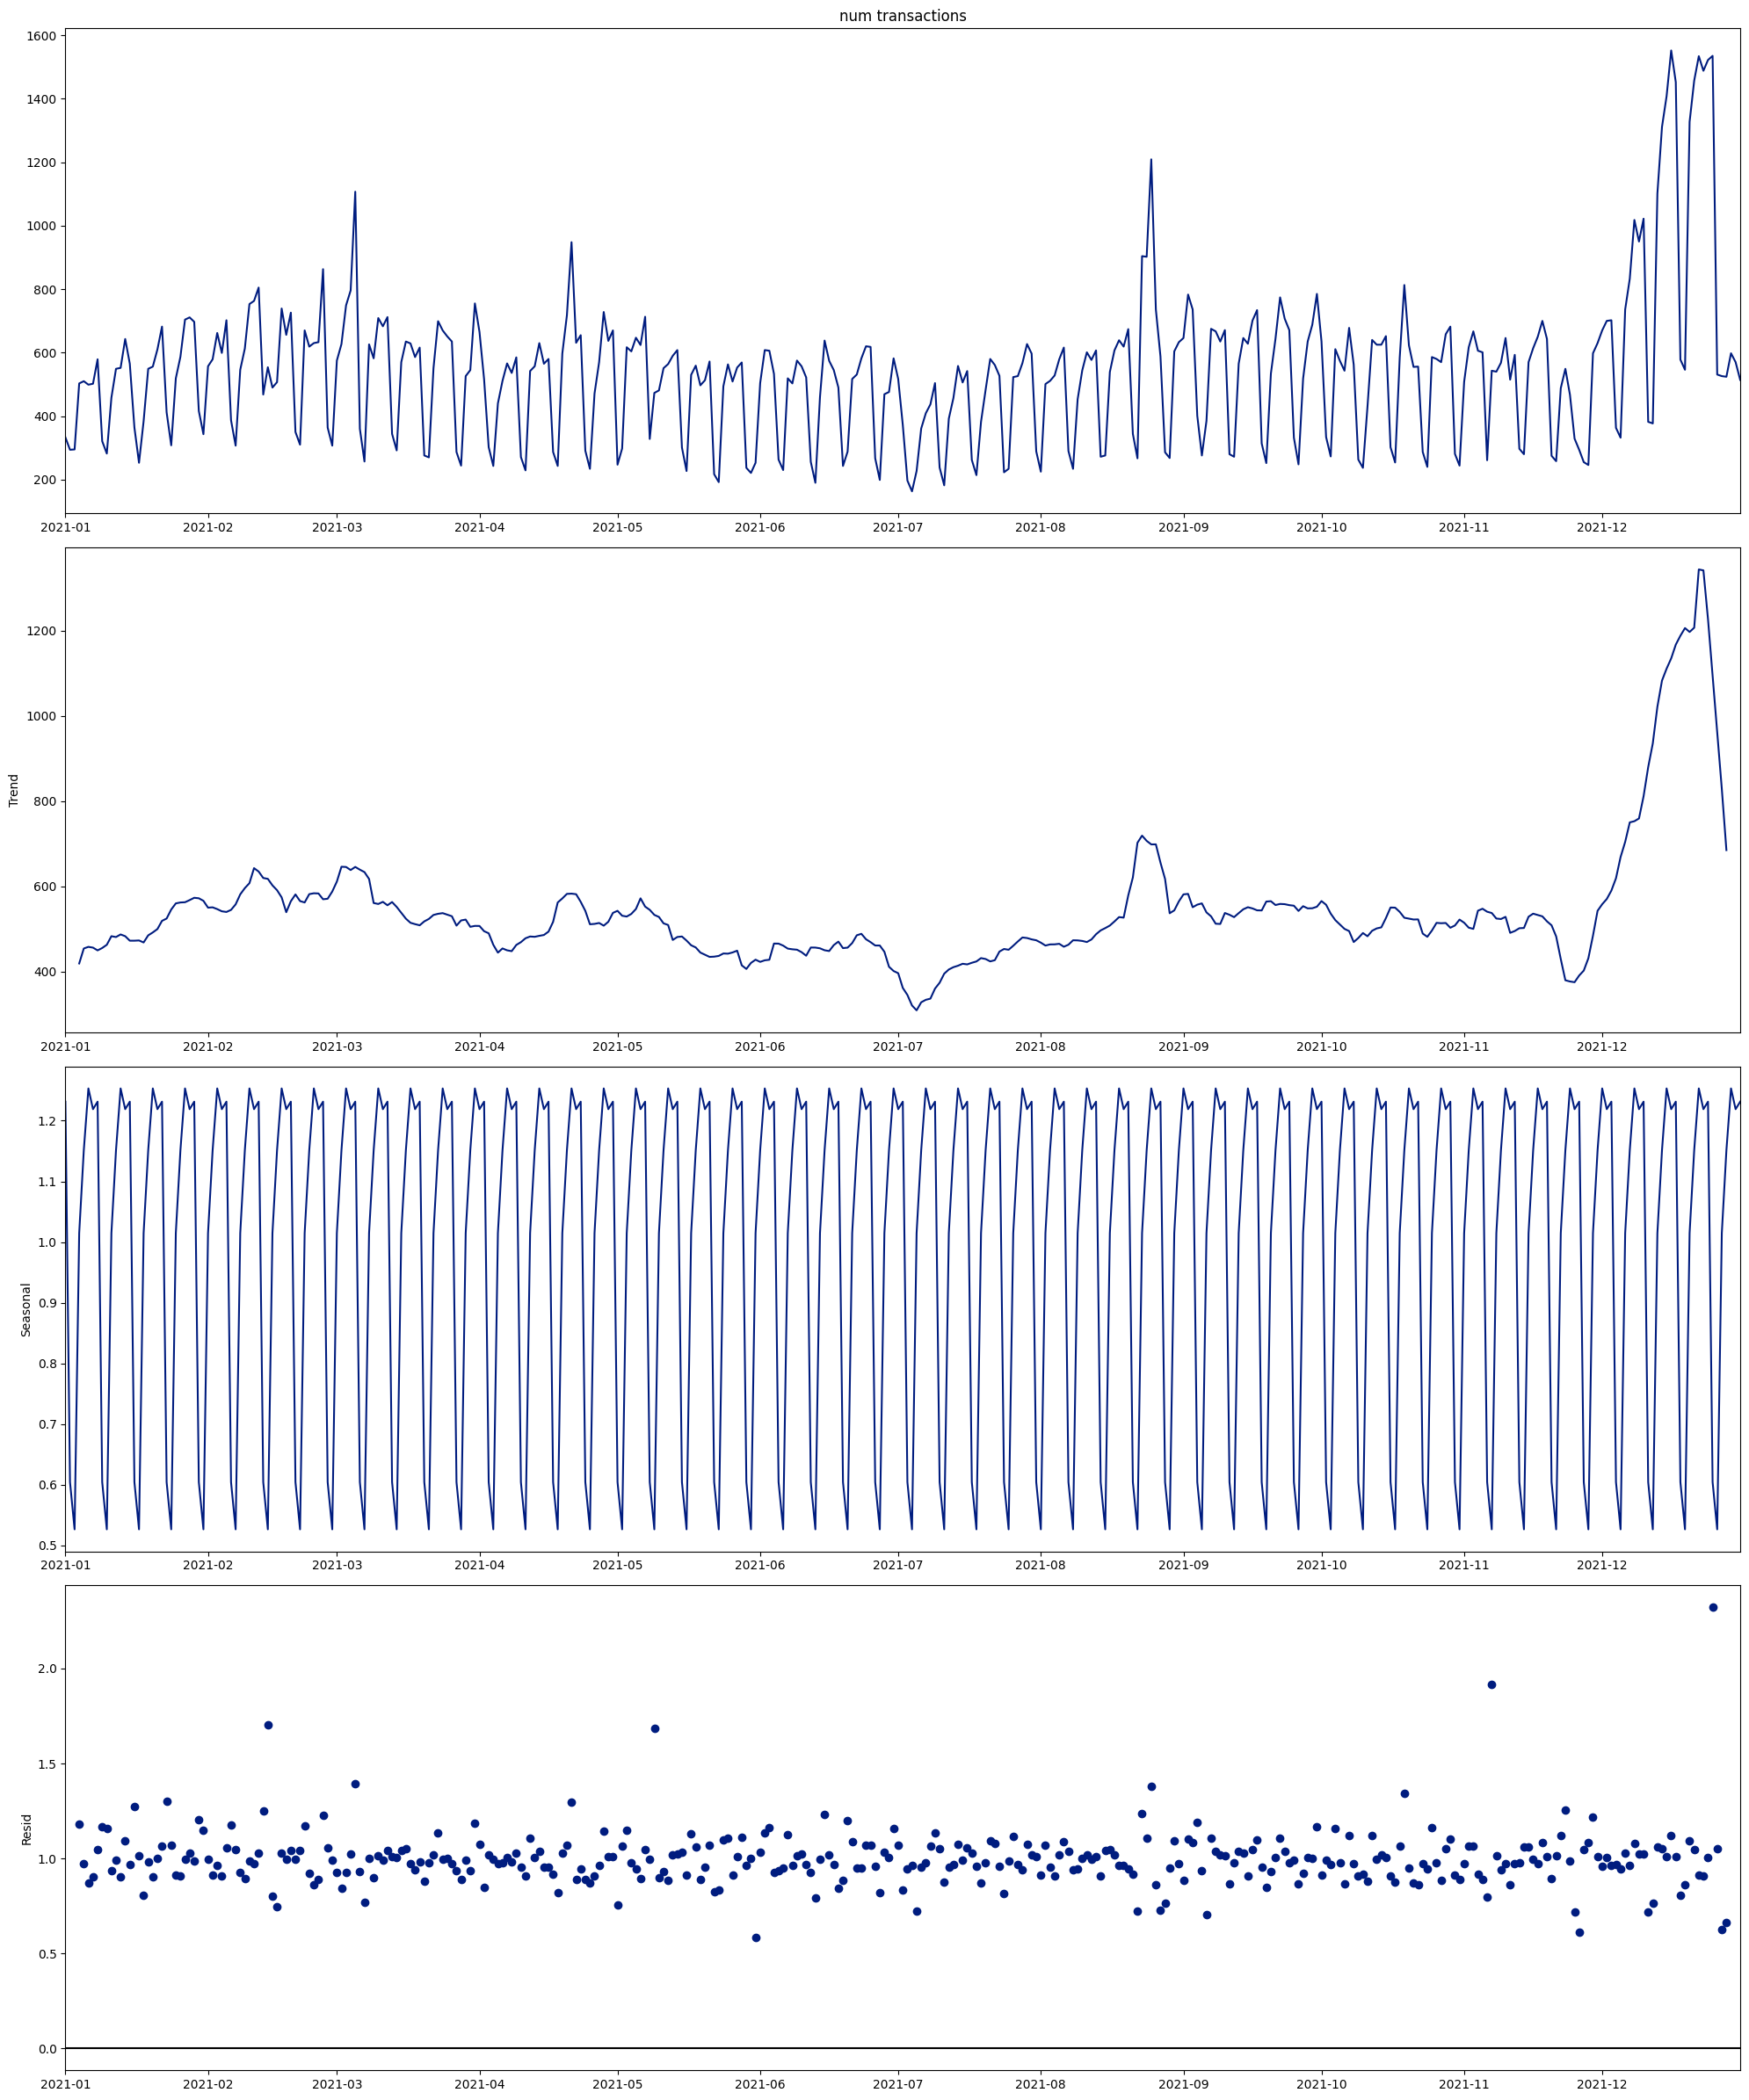

In [84]:
decomposition = sm.tsa.seasonal_decompose(temp['num transactions'], model='multiplicative') # multiplicative seasonal index
fig = decomposition.plot()
plt.show()

In [85]:
train = daily_sales_2021.copy()
test = daily_sales_2022.copy()

In [86]:
master=pd.concat([train,test])
ma_window=7
master['sma_forecast']= master['num transactions'].rolling(ma_window).mean()
master.head(10)

,num transactions,sma_forecast
date,,
2021-01-01,333,NaN
2021-01-02,294,NaN
2021-01-03,295,NaN
2021-01-04,503,NaN
2021-01-05,510,NaN
2021-01-06,499,NaN
2021-01-07,502,419.428571
2021-01-08,579,454.571429
2021-01-09,321,458.428571


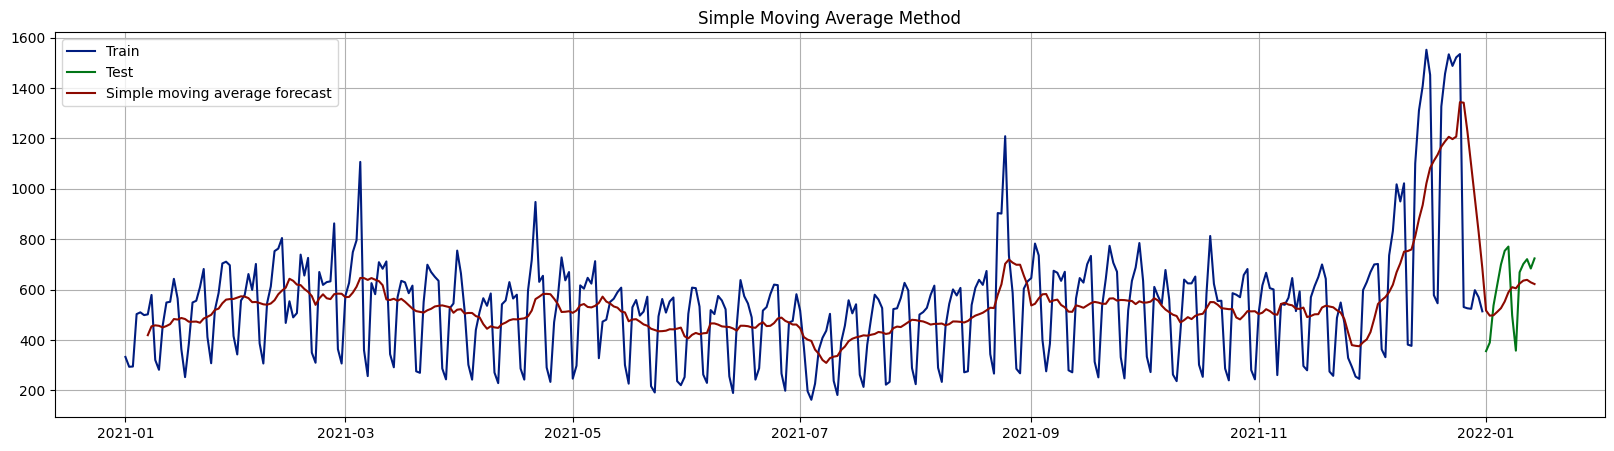

In [87]:
plt.figure(figsize=(20,5))
plt.grid()
plt.plot(train['num transactions'], label='Train')
plt.plot(test['num transactions'], label='Test')
plt.plot(master['sma_forecast'], label='Simple moving average forecast')
plt.legend(loc='best')
plt.title('Simple Moving Average Method')
plt.show()

In [88]:
#Calculating RMSE and MAPE
import numpy as np
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(test['num transactions'], master['sma_forecast'][-14:])).round(2)
mape = np.round(np.mean(np.abs(test['num transactions']-master['sma_forecast'][-14:])/test['num transactions'])*100,2)

results = pd.DataFrame({'Method':['Simple moving average forecast'], 'MAPE': [mape], 'RMSE': [rmse]})
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Simple moving average forecast,134.66,22.37


In [89]:
pred_2022_transactions = master['sma_forecast'].sum()
prediciton_2022 = pred_2022_transactions * av_purchase_val
print(f"Estimated total gift cards sold for 2022: {pred_2022_transactions.round()} \nEstimated Revenue for 2022: {prediciton_2022.round(2)}")

Estimated total gift cards sold for 2022: 202318.0 
Estimated Revenue for 2022: 1354217265.64
